# Fluxonium

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from bfqcircuits.core import fluxonium as flx

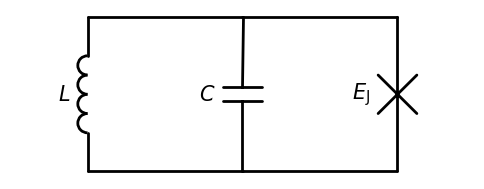

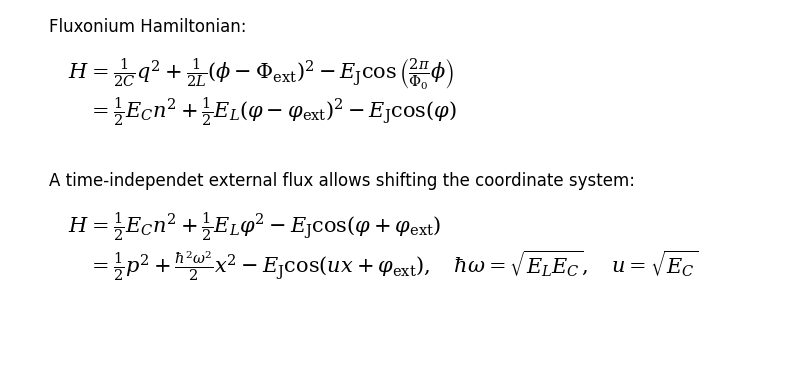

In [2]:
fluxonium = flx.Fluxonium()

fig = fluxonium.draw_circuit()
fig = fluxonium.show_formulas()

In [3]:
L = 300e-9
C = 5.0e-15
Ej = 7.0
N = 50

fluxonium.set_parameters(L=L, C=C, Ej=Ej, N=N)
fluxonium.calc_hamiltonian_parameters()
print(fluxonium.__repr__())

L = 3.0000e-07
C = 5.0000e-15
Ec = 3.0992e+01
El = 5.4487e-01
Ej = 7.0000e+00
Ejs = 0.0000e+00
Ejd = 0.0000e+00
ratio = 0.0000e+00
w = 4.1094e+00
u = 5.5671e+00
Z = 1.2003e+00
flux_zpf = 3.0906e-01
charge_zpf = 2.5748e-01



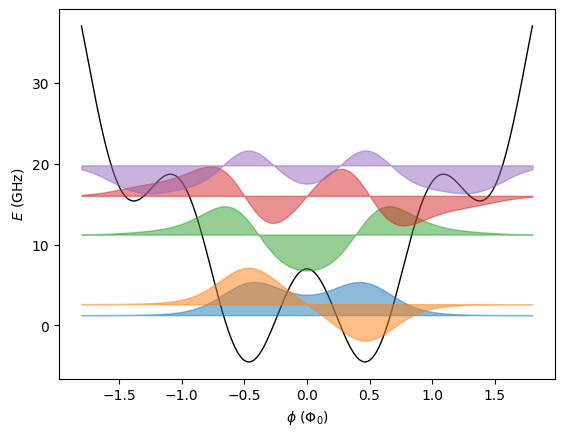

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)

fluxonium.set_parameters(p_ext=1.0 * np.pi)
fluxonium.diagonalize_hamiltonian()
fluxonium.plot_fluxonium(ax, 5, x_range=1.8, fill_between=True, scale=1.0)

plt.show()

## Sweeps
- the program is designed for 1D sweeps of the circuit parameters
- for the fluxonium certainly most important is the sweep of the external flux

### Flux sweep

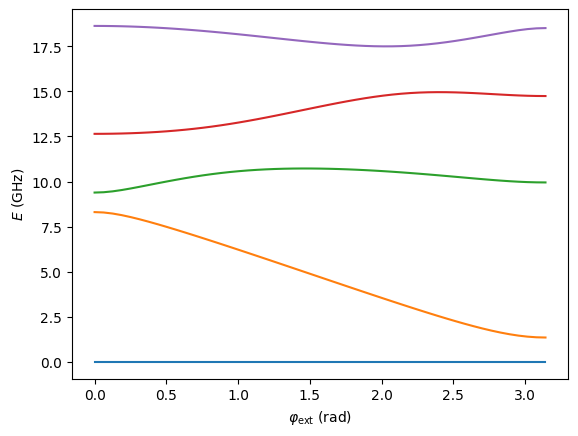

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)

fluxonium.sweep_external_flux(np.linspace(0.0, np.pi, 51))
fluxonium.substract_groundstate_energy_sweep()

fluxonium.plot_energy_sweep(ax, np.arange(5))

ax.set_xlabel(r"$\varphi_\text{ext}$ (rad)")

plt.show()

### Flux sweep with a SQUID-junction

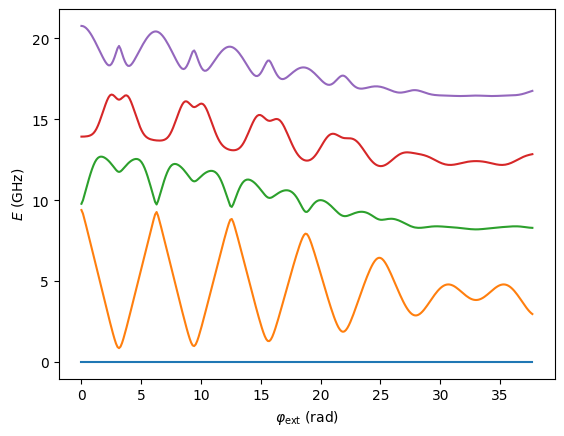

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)

Ejs = 10.0 # sum of SQUID junction Josephson energies
Ejd = 0.5  # sign is important: outer junction - inner junction
ratio = 10 # ratio of the fluxonium loop area (enclosed by the inner junction) and the SQUID loop area

fluxonium.set_parameters(Ejs=Ejs, Ejd=Ejd, ratio=10)
fluxonium.sweep_external_flux_squid(np.linspace(0.0, 6 * 2 * np.pi, 6 * 50 + 1))
fluxonium.substract_groundstate_energy_sweep()

fluxonium.plot_energy_sweep(ax, np.arange(5))

ax.set_xlabel(r"$\varphi_\text{ext}$ (rad)")

plt.show()

0.8983665966751616
5.093642671332348


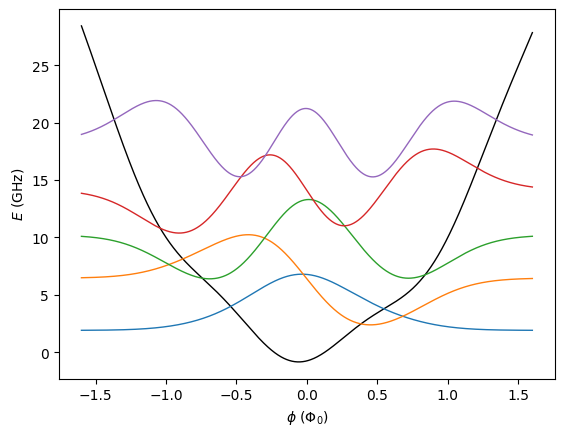

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)

fluxonium.add_groundstate_energy_sweep()
fluxonium.inspect_sweep(5 * 50)
print(fluxonium.Ej)
print(fluxonium.p_ext / (2 * np.pi))

fluxonium.plot_fluxonium(ax, 5, x_range=1.6, fill_between=False)

plt.show()

## Matrix elements and losses

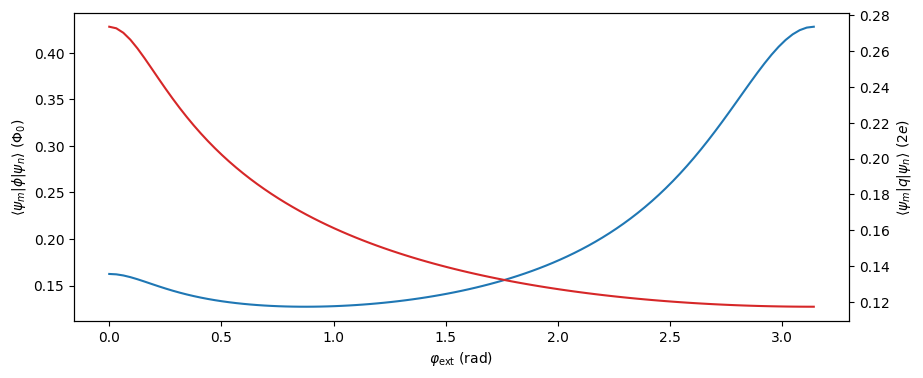

In [8]:
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111)

fluxonium.set_parameters(Ej=Ej)  # reset Ej to original value
fluxonium.sweep_external_flux(np.linspace(0.0, np.pi, 101))
fluxonium.substract_groundstate_energy_sweep()
flux_dm, charge_dm = fluxonium.calc_dipole_moments_sweep(0, 1)

ax.plot(fluxonium.par_sweep, flux_dm, color="C0")
ax.set_xlabel(r"$\varphi_\text{ext}$ (rad)")
ax.set_ylabel(r"$\langle \psi_m|\phi| \psi_n\rangle$ ($\Phi_0$)")

axt = ax.twinx()
axt.plot(fluxonium.par_sweep, charge_dm, color="C3")
axt.set_ylabel(r"$\langle \psi_m|q| \psi_n\rangle$ ($2e$)")

plt.show()

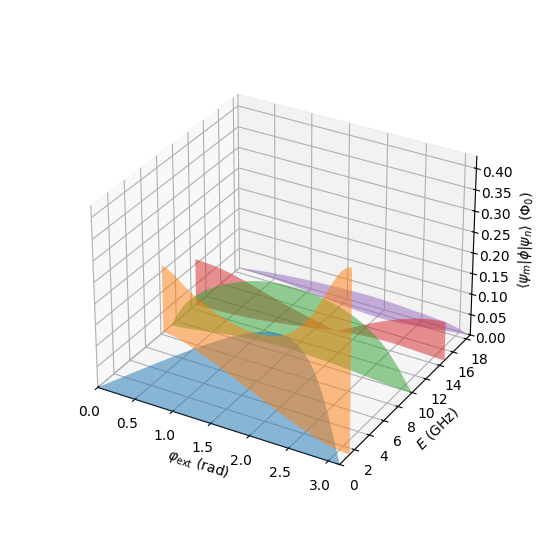

In [9]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection="3d")

fluxonium.plot_dipole_to_various_states_sweep(ax, 0, np.arange(5), dipole="flux")

ax.set_box_aspect(aspect=None, zoom=0.8)

ax.set_xlabel(r"$\varphi_\text{ext}$ (rad)")

plt.show()

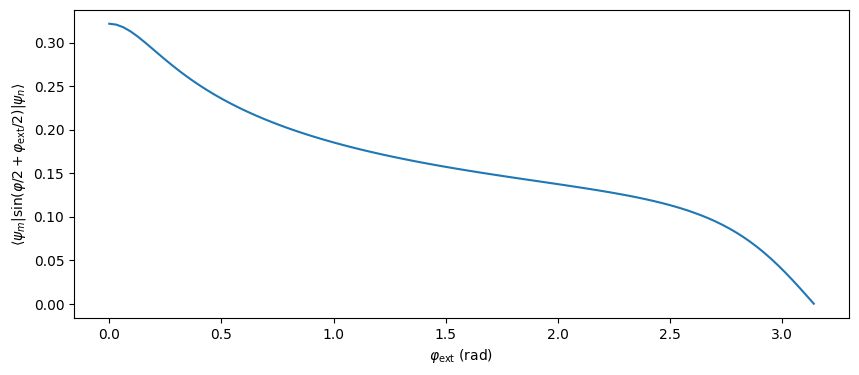

In [10]:
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111)

sin_mel = fluxonium.calc_sin_phi_over_two_sweep(0, 1)
ax.plot(fluxonium.par_sweep, sin_mel)

ax.set_xlabel(r"$\varphi_\text{ext}$ (rad)")
ax.set_ylabel(r"$\langle \psi_m|\sin(\varphi /2 + \varphi_\text{ext} / 2)| \psi_n\rangle$")

plt.show()

### Inductive loss

In [11]:
Q_ind = 1e6 # inductive loss quality factor
T = 25.0 # in [mK]

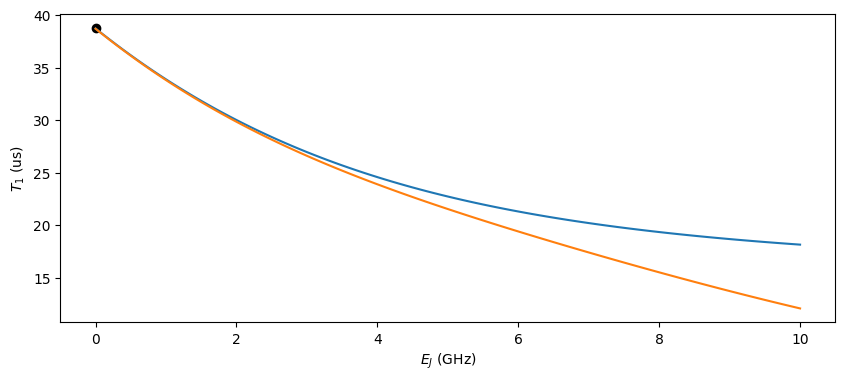

In [12]:
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111)

fluxonium.set_parameters(L=L, C=C, p_ext=np.pi)
fluxonium.calc_hamiltonian_parameters()
fluxonium.sweep_parameter(np.linspace(0.0, 10, 101), "Ej")

G1_TLSs = fluxonium.calc_inductive_loss_sweep(1, 0, Q_ind, environment="TLSs")
G1_bosonic = fluxonium.calc_inductive_loss_sweep(1, 0, Q_ind, environment="Bosonic", T=T)

ax.plot(fluxonium.par_sweep, 1 / G1_TLSs)
ax.plot(fluxonium.par_sweep, 1 / G1_bosonic)
ax.scatter(0.0, 1e6 * Q_ind / (2e9 * np.pi * fluxonium.w), color="k")  # harmonic oscillator limit

#ax.plot(fluxonium.par_sweep, 1e6 * Q_ind * 1e-34 / 2e-15 * 
#        (fluxonium.E_sweep[1, :] - fluxonium.E_sweep[0, :]) / fluxonium.w)  # TODO approximation

ax.set_xlabel("$E_J$ (GHz)")
ax.set_ylabel("$T_1$ (us)")

plt.show()

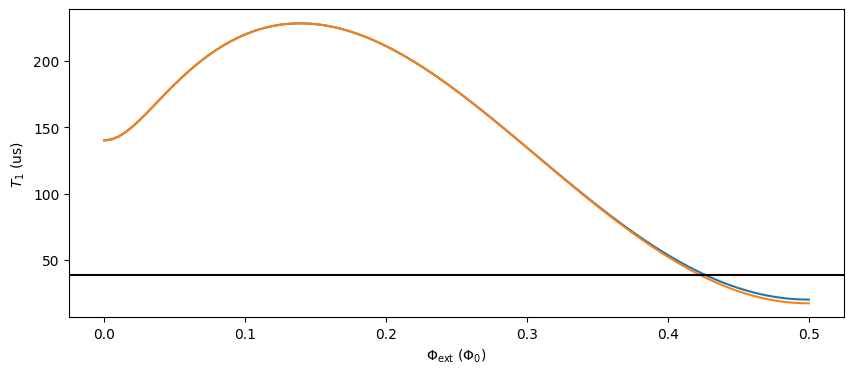

In [13]:
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111)

fluxonium.set_parameters(L=L, C=C, Ej=Ej, p_ext=np.pi)
fluxonium.calc_hamiltonian_parameters()
fluxonium.sweep_external_flux(np.linspace(0.0, np.pi, 101))

G1_TLSs = fluxonium.calc_inductive_loss_sweep(1, 0, Q_ind, environment="TLSs")
G1_bosonic = fluxonium.calc_inductive_loss_sweep(1, 0, Q_ind, environment="Bosonic", T=T)

ax.plot(fluxonium.par_sweep / (2 * np.pi), 1 / G1_TLSs)
ax.plot(fluxonium.par_sweep / (2 * np.pi), 1 / G1_bosonic)
ax.axhline(1e6 * Q_ind / (2e9 * np.pi * fluxonium.w), color="k")  # harmonic oscillator

ax.set_xlabel(r"$\Phi_\mathrm{ext}$ ($\Phi_0$)")
ax.set_ylabel("$T_1$ (us)")

plt.show()

### Capacitive loss

In [14]:
Q_cap = 1e6 # inductive loss quality factor
T = 25.0 # in [mK]

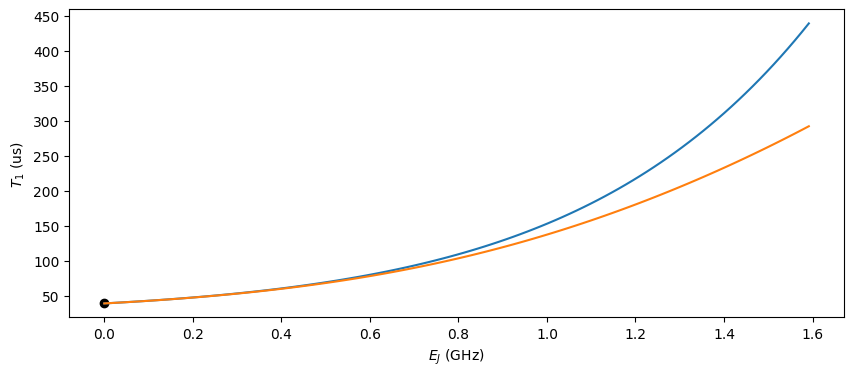

In [15]:
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111)

fluxonium.set_parameters(L=L, C=C, p_ext=np.pi)
fluxonium.calc_hamiltonian_parameters()
fluxonium.sweep_parameter(np.linspace(0.0, 10, 101), "Ej")

G1_TLSs = fluxonium.calc_capacitive_loss_sweep(1, 0, Q_cap, environment="TLSs")
G1_bosonic = fluxonium.calc_capacitive_loss_sweep(1, 0, Q_cap, environment="Bosonic", T=T)

ax.plot(fluxonium.par_sweep / (2 * np.pi), 1 / G1_TLSs)
ax.plot(fluxonium.par_sweep / (2 * np.pi), 1 / G1_bosonic)
ax.scatter(0.0, 1e6 * Q_ind / (2e9 * np.pi * fluxonium.w), color="k")  # harmonic oscillator

ax.set_xlabel("$E_J$ (GHz)")
ax.set_ylabel("$T_1$ (us)")

plt.show()

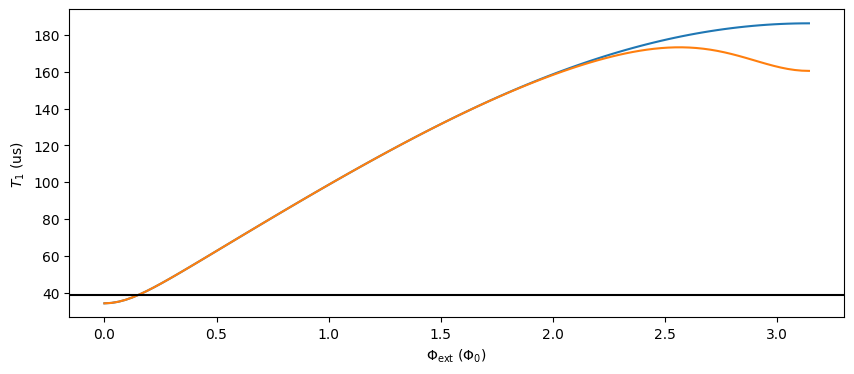

In [16]:
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111)

fluxonium.set_parameters(L=L, C=C, Ej=Ej, p_ext=np.pi)
fluxonium.calc_hamiltonian_parameters()
fluxonium.sweep_external_flux(np.linspace(0.0, np.pi, 101))

G1_TLSs = fluxonium.calc_capacitive_loss_sweep(1, 0, Q_cap, environment="TLSs")
G1_bosonic = fluxonium.calc_capacitive_loss_sweep(1, 0, Q_cap, environment="Bosonic", T=T)

ax.plot(fluxonium.par_sweep, 1 / G1_TLSs)
ax.plot(fluxonium.par_sweep, 1 / G1_bosonic)
ax.axhline(1e6 * Q_ind / (2e9 * np.pi * fluxonium.w), color="k")  # harmonic oscillator limit

ax.set_xlabel(r"$\Phi_\mathrm{ext}$ ($\Phi_0$)")
ax.set_ylabel("$T_1$ (us)")

plt.show()

## Convergence

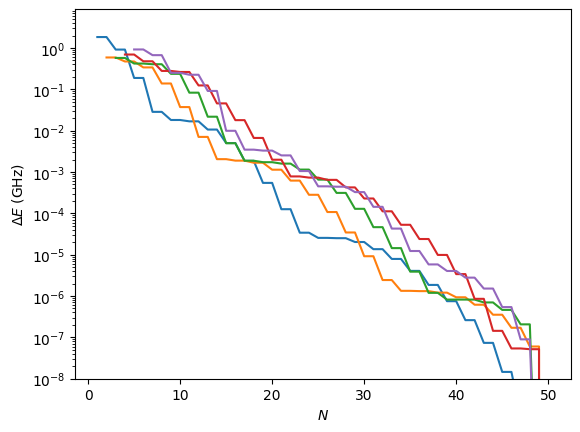

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)

# reset parameters
fluxonium.set_parameters(L=L, C=C, Ej=Ej, N=N)
fluxonium.calc_hamiltonian_parameters()
fluxonium.convergence_sweep(50)
fluxonium.plot_convergence_sweep(ax, 5)

ax.set_yscale("log")
ax.set_ylim(bottom=1e-8)

plt.show()

## Fit a fluxonium spectrum

In [18]:
#data = np.loadtxt("C:/...")

# create data
fluxonium.set_parameters(L=300e-9, C=5e-15, Ej=9, N=25)
fluxonium.calc_hamiltonian_parameters()
fluxonium.diagonalize_hamiltonian()
fluxonium.sweep_external_flux(np.linspace(0.0, np.pi, 11))
fluxonium.substract_groundstate_energy_sweep()

data = np.vstack((
    np.vstack((fluxonium.par_sweep, fluxonium.E_sweep[1, :], 1 * np.ones(fluxonium.steps))).T,
    np.vstack((fluxonium.par_sweep, fluxonium.E_sweep[2, :], 2 * np.ones(fluxonium.steps))).T,
    np.vstack((fluxonium.par_sweep, fluxonium.E_sweep[3, :], 3 * np.ones(fluxonium.steps))).T,
    np.vstack((fluxonium.par_sweep, fluxonium.E_sweep[4, :], 4 * np.ones(fluxonium.steps))).T
))

data.shape

(44, 3)

In [19]:
from source import fit_fluxonium as fitflx

#reload(fitflx)
fit_spectrum = fitflx.FitFluxonium()

Cost: 58.18955341136534


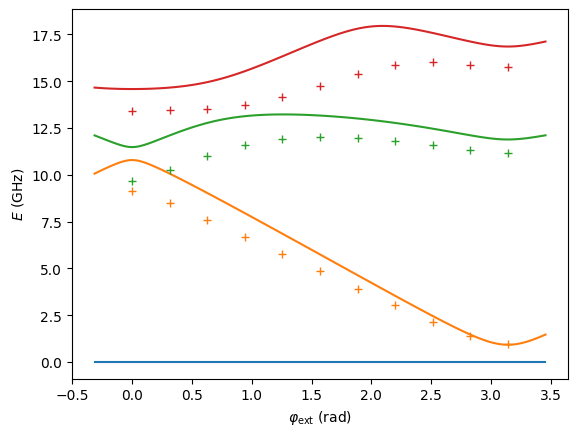

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)

fit_spectrum.set_initial_value(data, 250e-9, 5e-15, 10.0, 25)
fit_spectrum.plot_fit(ax)

plt.show()

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         5.8190e+01                                    1.62e+03    
       1              2         8.8797e-01      5.73e+01       1.01e+00       1.25e+02    
       2              3         1.2560e-03      8.87e-01       9.37e-02       1.44e+00    
       3              4         6.6413e-08      1.26e-03       2.83e-02       9.60e-03    
       4              5         1.8019e-16      6.64e-08       2.00e-04       5.32e-07    
       5              6         1.6435e-26      1.80e-16       1.06e-08       6.25e-13    
`gtol` termination condition is satisfied.
Function evaluations 6, initial cost 5.8190e+01, final cost 1.6435e-26, first-order optimality 6.25e-13.
Cost: 1.6435325314600865e-26

L: 300.00000000000006nH
C: 5.000000000000011fF
Ej: 9.000000000000025GHz


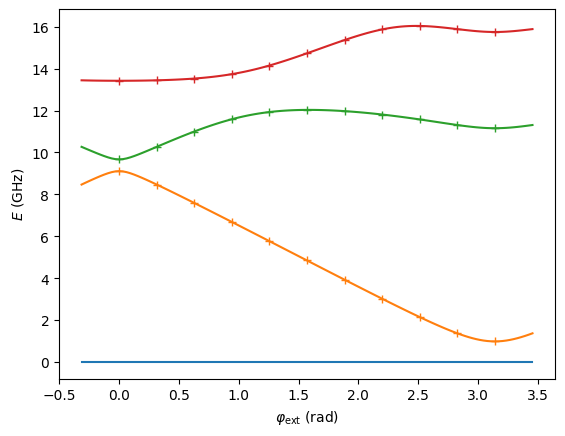

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)

fit_spectrum.fit()
fit_spectrum.plot_fit(ax)

plt.show()

## More...
- get creative with the code and adapt it to your needs